# Big Data Engineering (1) - Bottlenecks in big data handling

Before we dive into coding, it’s important to understand a fundamental concept in data processing: data movement. In nearly every real-world scenario, our goal is to collect vast amounts of data and utilize it—whether that’s for visualization, statistical analysis, or machine learning. To achieve this, data must be transferred across different parts of the computer’s hardware, each with its own speed and limitations.

## Data Movement within a Computer

Data in a computer flows through several layers of storage and memory. Here’s a brief overview of the hierarchy and the typical transfer speeds:

- CPU Cache: The fastest memory available, located directly on the CPU. It can access data in nanoseconds, but its size is very limited.

- RAM (Main Memory): Faster than hard drives, with access times measured in tens of nanoseconds. However, it is volatile and more expensive per byte.

- Solid State Drives (SSD) & Hard Disk Drives (HDD): Non-volatile storage that holds data persistently. SSDs are significantly faster than HDDs but still lag behind RAM.

-  Network/Cloud Storage: Data stored remotely, which may be subject to network latencies and bandwidth limitations.

When you load an image from disk (or the cloud), you’re encountering these bottlenecks. Even though modern CPUs can process data very quickly once it’s loaded into RAM or the cache, the process of reading the data from slower storage mediums can become a major delay. This is particularly noticeable in big data applications, where the sheer volume of data (or the need to access it rapidly) can lead to performance challenges.

*But how bad is this really?*

Just by looking at the hardware infrastructure it is clear that loading data from an SSD will be slower than handling data that we have in RAM. But let's have a look at what this would mean for our project for which we plan to handle about 500,000 images!

## Quick Introduction to OpenCV for Image Handling

In today’s live coding session, we will start by handling images in Python using OpenCV. OpenCV (Open Source Computer Vision Library) is a powerful and widely-used tool for image processing and computer vision tasks. It provides functions for:

- Reading and Writing Images: Easily load images from disk and save processed images.
- Image Manipulation: Resize, crop, rotate, and adjust colors.
- Filtering and Transformations: Apply blurring, edge detection, and other filters.
- Feature Extraction: Identify key features and perform tasks like object detection or image matching.

### Why OpenCV?

- Efficiency: OpenCV is optimized in C/C++ and offers a Python interface, meaning that many functions run very efficiently even on large images.
- Comprehensive Functionality: From simple image I/O to complex computer vision algorithms, OpenCV covers a wide range of tasks.
- Community and Resources: With a large community, extensive documentation, and many tutorials available online, learning OpenCV can open up many possibilities for both academic projects and industry applications.

Python library imports:

In [42]:
import os
import time
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [43]:
os.getcwd()

'c:\\Users\\jfham\\OneDrive\\Dokumente\\Laptop_Clones\\Big_Data_Engineering\\LC\\LC01'

Here a very basic code example to load an image from a given image file using openCV:

In [44]:
# Define the path to the folder containing the images
filename = r"C:\Users\jfham\OneDrive\Dokumente\Laptop_Clones\Big_Data_Engineering\LC\LC01\Testbilder-20250328\dove-2516641_1920.jpg"

image = plt.imread(filename)

## Exercise 1:
Open an image (by adapting the above code snippet) and try to answer the following questions:

- What type of object do we get?
- What are the dimensions and what do they mean?

In [45]:
print(type(image))
print(image.shape)

<class 'numpy.ndarray'>
(1065, 1920, 3)


## Exercise 2:
Show the image! Use the following function for this which uses matplotlib (`plt.imshow()`).

(there are many other options to display images, but for now this will be good enough)

In [46]:
def display_image(img):
    """A very simple function to display an image."""
    plt.imshow(img)
    plt.axis(False)
    plt.show()

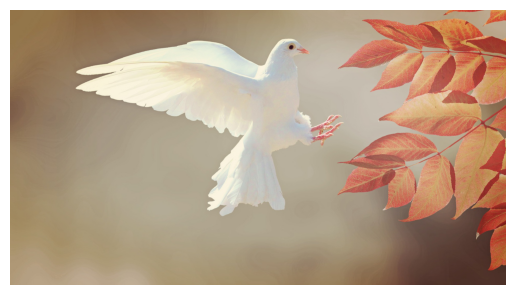

In [47]:
display_image(image)

## Exercise 3 - Play with the Array 
Experiment a bit to answer the following questions:
- What happens if you multiply the image values by 0.25?
- Let's look at an image where we set all but one layer to zeros! What happens?

Then do the following:
- Using Numpy, try to show only a small part of the image (100 x 100 pixels)
- Using Numpy, try to turn the image.

Multiply by 0.25

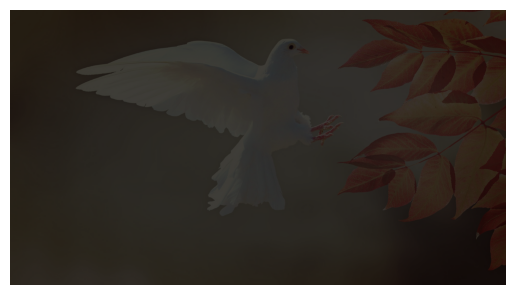

In [48]:
image_edited = image.copy()
image_edited = (image_edited * 0.25).astype(np.uint8)
display_image(image_edited)

# your code

1st and 2nd layer to zeros

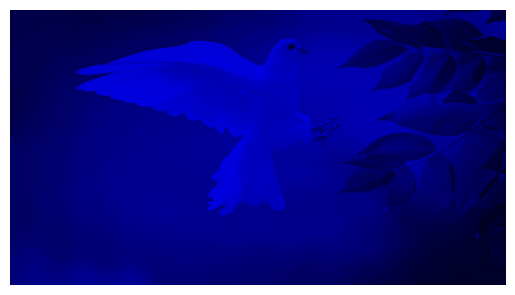

In [49]:
image_edited = image.copy()
image_edited[:, :, 0] = 0  # Red-Kanal
image_edited[:, :, 1] = 0  # Green-Kanal
display_image(image_edited)
# your code

1st and 3rd layer to zeros

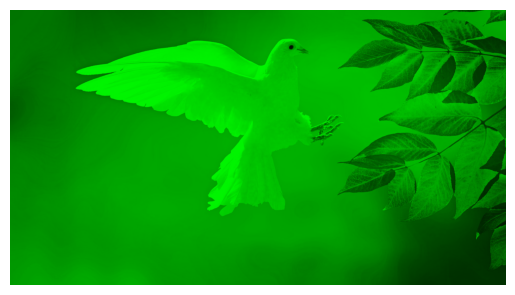

In [50]:
image_edited = image.copy()
image_edited[:, :, 0] = 0  # Red-Kanal
image_edited[:, :, 2] = 0  # Blue-Kanal
display_image(image_edited)


2nd and 3rd layer to zeros

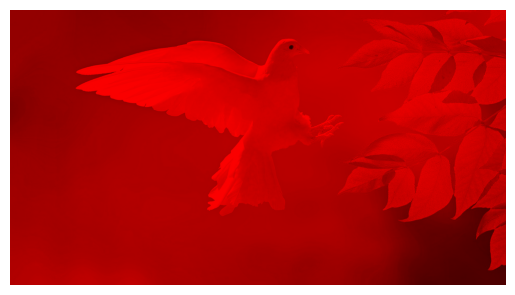

In [51]:
image_edited = image.copy()
image_edited[:, :, 1] = 0  # Green-Kanal
image_edited[:, :, 2] = 0  # Blue-Kanal
display_image(image_edited)


Small Part (100 x 100)

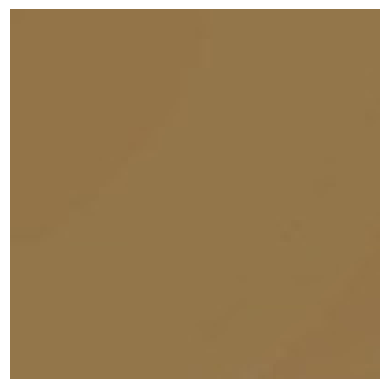

In [52]:
image_edited = image[:100, :100].copy()
display_image(image_edited)


Turned Image (180°)

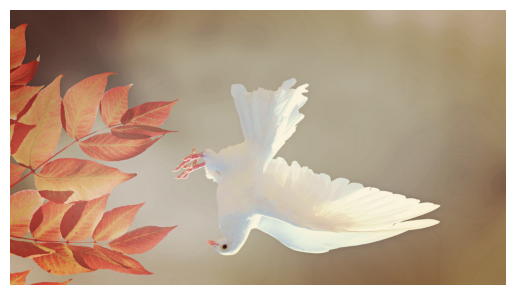

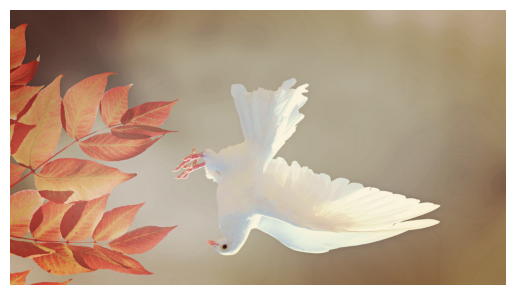

In [53]:
image_edited = np.rot90(image, 2)  # 2x 90° = 180°
display_image(image_edited)
image_edited = np.flipud(np.fliplr(image))  # erst links-rechts, dann oben-unten
display_image(image_edited)



## Exercise 4:
Compute and return the maximums brightness value of an image (R + G + B). Write a small function for this that we can use later on.

In [54]:
def get_max_brightness(image: np.ndarray):
    """
    Returns maximum pixel brightness value of input image.
    Brightness is calculated as R + G + B.
    """
    brightness = np.sum(image, axis=2)  # Summe der Farbkanäle (RGB) für jeden Pixel
    return np.max(brightness)           # größter Helligkeitswert im Bild


In [55]:
max_brightness = get_max_brightness(image)
print(f"Brightest pixel value is {max_brightness} (theoretical maximum: {255 * 3})")

Brightest pixel value is 756 (theoretical maximum: 765)


OK, now back to *big data*!

## Goal: Estimate how long it takes to load a bigger datasets (here: images).
Try to experiment with a few images to answer the following questions:
1. How long would it take to load 1,000,000 images (image size of about 1-5 million pixels) from our local hard disk?
2. How long would it take to do a simple operation on all images (for example: compute the maximum brightness)?
3. How long would a simple operation on 1,000,000 images take if the images are in the RAM? (and: would that be possible?)

### How to evaluate the time
- Use the default library `time` to measure how long it takes to run a script.
- Hint: To get an OK-ish estimate for 1,000,000 images, we do not need to work with that amount ;)

### Step 1:
- Copy some images into a local folder (for instance `test_images/`)
- Loop over all images in the test_images folder.
- Load image using opencv.
- Compute maximum pixel brightness value in image and store in list (or print).
- **Measure the time this takes!**

After copying, check your folder

In [56]:
# Define the path to the folder containing the images
path_images = r"C:\Users\jfham\OneDrive\Dokumente\Laptop_Clones\Big_Data_Engineering\LC\LC01\Testbilder-20250328"

# Get a list of all the image filenames in the folder
image_filenames = os.listdir(path_images)
image_filenames

['dove-2516641_1920.jpg',
 'hummingbird-2139278_1920.jpg',
 'kingfisher-2046453_1920.jpg',
 'peacock-90051_1920.jpg',
 'puffin-5404178_1920.jpg']

Load each image and print maximum pixel brightness value AND measure the time this takes

In [57]:
brightness_values = []

start_time = time.time()

# Schleife über alle Bilder
for filename in os.listdir(path_images):
    if filename.lower().endswith((".png", ".jpg", ".jpeg")):
        img_path = os.path.join(path_images, filename)
        image = cv2.imread(img_path)  # Bild laden mit OpenCV (BGR!)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # nach RGB konvertieren
        brightness = get_max_brightness(image)
        brightness_values.append(brightness)

end_time = time.time()

print(f"Laufzeit für {len(brightness_values)} Bilder: {end_time - start_time:.2f} Sekunden")

Laufzeit für 5 Bilder: 0.31 Sekunden


### Compare:
- How long does this take?
- How long does this take if we skip the maximum brightness search?

In [58]:
start_time = time.time()

for filename in image_filenames:
    img_path = os.path.join(path_images, filename)
    image = cv2.imread(img_path)  # nur laden, nichts weiter tun

end_time = time.time()

print(f"Nur Laden von {len(image_filenames)} Bildern: {end_time - start_time:.2f} Sekunden")

Nur Laden von 5 Bildern: 0.07 Sekunden


### Step 2: How long would it take to load 1,000,000 images?
- Make a good guess based on the images you have on how long it will take to load one million images from disk.
- What takes longer: loading or processing?

In [59]:
# SET YOUR CALCULATED RUNTIME HERE
runtime = 0.12  # seconds

time_per_image = runtime/5 # your code here
print(f"Loading one image takes about {time_per_image:.4f}s")

num_images = 1_000_000
time_total = (time_per_image * num_images) / 60
print(f"Loading 1.000.000 images would then take about {time_total:.3f} minutes")

Loading one image takes about 0.0240s
Loading 1.000.000 images would then take about 400.000 minutes


---
## Cloud better than hard disk?

If we do not want to store all images on our hard disk, or if we simple cannot because this are too many, we could store the images "in the cloud". But, how fast/slow would that be?

Answer the same question as before now for a cloud option:

How long would it take us to get 1,000,000 images from a common cloud server (here pexels)?

### How to get an image from a URL?
Wr can download an image with `requests` and save it in a local folder using `shutil`.
This can be done using `requests.get(my_url)`.

- What is `stream` for? (https://requests.readthedocs.io/en/latest/user/advanced/)
- What does this return? An image?
- Try the methods `.status_code`, `.raw`, `.content`.

In [60]:
import requests

image_url = "https://images.pexels.com/photos/1159577/pexels-photo-1159577.jpeg"
result = requests.get(image_url)

In [61]:
result

<Response [200]>

In [62]:
result.raw 

In [63]:
type(result.content)

bytes

In [64]:
result.status_code

200

### How to get to the actual image?
- Look at `.content`, what do we have to do to get this into something image-like?
- Try to convert this using `np.frombuffer` (using the target data type `np.uint8`)

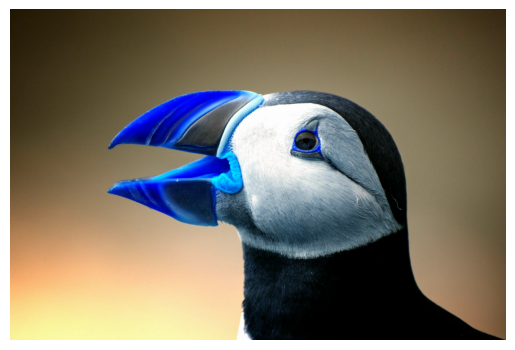

In [65]:
# Read the image data into a numpy array
image_array = np.frombuffer(result.content, np.uint8)

# Decode the numpy array into an image using OpenCV
image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

plt.imshow(image)
plt.axis(False)
plt.show()

### Does this work or not?

--> Problem: RGB vs. BGR! --> Change R(ed) and B(lue) channels.

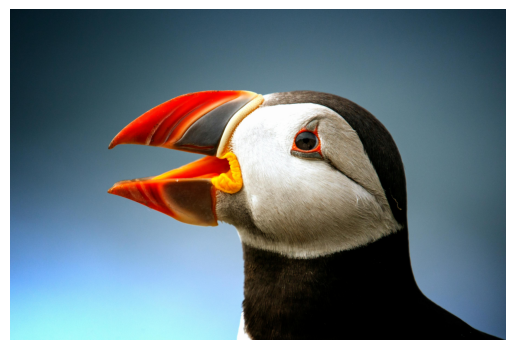

In [66]:
# Download the image from the URL
#result = requests.get(image_url)

# Read the image data into a numpy array
image_array = np.frombuffer(result.content, np.uint8)

# Decode the numpy array into an image using OpenCV
image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
# image = cv2.cvtColor(image_array, cv2.BGR2RGB)

plt.imshow(image[:, :, ::-1])
plt.axis(False)
plt.show()

In [67]:
image.shape

(2424, 3636, 3)

### Save image
- The image can best be saved using `shutil` which has a suitable method called `.copyfileobj()`.

In [68]:
import shutil


result = requests.get(image_url, stream=True)
with open("my_test_file.jpg", 'wb') as f:
    shutil.copyfileobj(result.raw, f)

## Download multiple images:
- Write a script to download all images for which we have urls in the following list.
- How long does it take to download all those images? (don't count the time to save the images)

In [69]:
# here some example url's that should work (images from pexels)

image_urls = [
    "https://images.pexels.com/photos/1159577/pexels-photo-1159577.jpeg",
    "https://images.pexels.com/photos/2233442/pexels-photo-2233442.jpeg",
    "https://images.pexels.com/photos/106685/pexels-photo-106685.jpeg",
    "https://images.pexels.com/photos/15796799/pexels-photo-15796799/free-photo-of-close-up-on-face-of-swan.jpeg"
]

In [70]:
import requests # request img from web
import shutil # save img locally
import time

def get_image(image_url):
    result = requests.get(image_url, stream=True)

    file_name = image_url.split("/")[-1]

    if result.status_code == 200:
        with open(file_name, 'wb') as f:
            shutil.copyfileobj(result.raw, f)
        print('Image sucessfully Downloaded: ', file_name)
    else:
        print('Image couldn\'t be retrieved')


for image_url in image_urls:
    get_image(image_url)

Image sucessfully Downloaded:  pexels-photo-1159577.jpeg
Image sucessfully Downloaded:  pexels-photo-2233442.jpeg
Image sucessfully Downloaded:  pexels-photo-106685.jpeg
Image sucessfully Downloaded:  free-photo-of-close-up-on-face-of-swan.jpeg


In [71]:
import time

tstart = time.time()
for image_url in image_urls:
    result = requests.get(image_url)#, stream = True)

# show computation time
compute_time = time.time() - tstart
print(f"------- Computation took {compute_time}s.")

------- Computation took 0.7110185623168945s.
